In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

Экспоненциальное распределение с параметром $\lambda = 1.5$:

In [2]:
lam = 1.5
rv = sts.expon(scale=1/lam)

Генерация выборки размера 1000:

In [3]:
sample = rv.rvs(size=1000)

Гистограмма и график истинной плотности распределения:

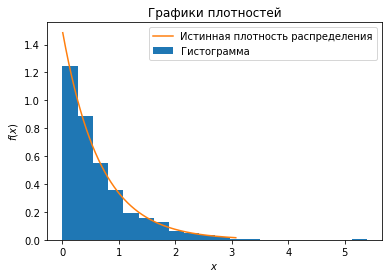

In [4]:
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
plt.hist(sample, density=True, bins=20, label='Гистограмма')
plt.plot(x, rv.pdf(x), label='Истинная плотность распределения')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Графики плотностей')
plt.legend()
plt.show()

Функция генерации $n\_samples$ наборов величиной $N$:

In [5]:
def get_samples(distr, n_samples, N):
    return distr.rvs(size=(n_samples, N))

Для экспоненциального распределения:
$$ E[X] = \frac{1}{\lambda} \\ D[X] = \frac{1}{\lambda^2} $$ \
Соотвественно, если $n$ - размер выборки, по которой считается среднее, то по ЦПТ распределение средних будет приближаться распредлением $ N(\frac{1}{\lambda}, \frac{1}{n\lambda^2})$

В нашем случае $\lambda = 1.5 = \frac{3}{2}$. Тогда $N(\frac{1}{\lambda}, \frac{1}{N*\lambda^2}) = N(\frac{2}{3}, \frac{4}{9n})$

Возьмем n = 5, 10, 50, тогда соотвественно имеем распределения $ N(\frac{2}{3}, \frac{4}{45}), N(\frac{2}{3}, \frac{4}{90}), N(\frac{2}{3}, \frac{4}{450})$  

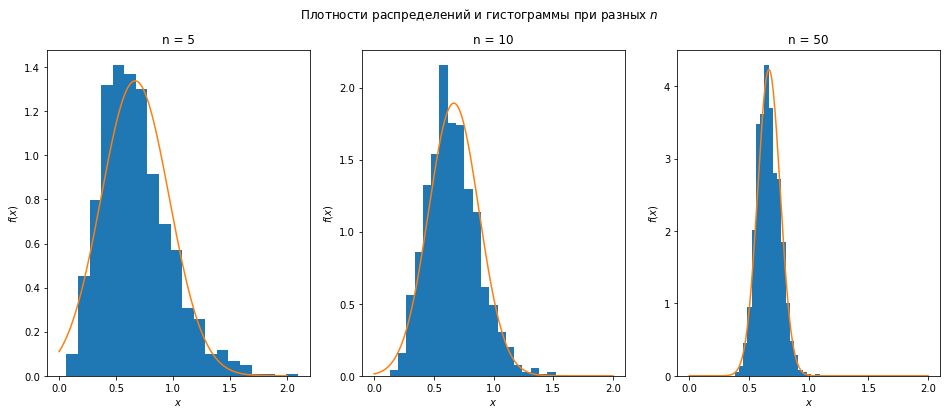

In [7]:
m, v = np.squeeze(rv.stats())

x_ = np.linspace(0, 2, 1000)
fig, ax = plt.subplots(1, 3, figsize=(16, 6))

for i, n in enumerate([5, 10, 50]):
    ax[i].hist(np.mean(get_samples(rv, 1000, n), axis=1), density=True, bins=20)
    ax[i].plot(x_, sts.norm.pdf(x_, loc=m, scale=np.sqrt(v/n)))
    ax[i].set_xlabel('$x$')
    ax[i].set_ylabel('$f(x)$')
    ax[i].set_title('n = {}'.format(n))
    
plt.suptitle('Плотности распределений и гистограммы при разных $n$')
plt.show()

Как видно, при увеличении $n$ точность аппроксимации растет. 